<a href="https://colab.research.google.com/github/sapanapawar/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Sapana_Pawar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Loading the Required Libraries and Modules

In [55]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

The first step is to explore the dataset and understand the data.

#Mount drive & load the dataset

In [56]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#Working directory path
file_path = '/content/drive/MyDrive/pd csv file/SeoulBikeData.csv'

In [58]:
#Reading the dataset
dataset = pd.read_csv(file_path, encoding= 'unicode_escape')

#Exploration

In [59]:
#Let's how the dataset look like
dataset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [60]:
#Renaming the columns
dataset.columns=['Date','Rent_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'DPT',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day']

In [61]:
#Observing first five rows
dataset.head()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [62]:
#Observing last five rows
dataset.tail()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [63]:
#Checking for number of rows and columns
dataset.shape

(8760, 14)

There are total 8760 columns and 14 rows in the dataset.

In [64]:
#Let's see the descriptive summary 
dataset.describe(include='all')

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,18/05/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


The describe() function provides a statistical summary of all the quantitative variables.



In [65]:
#Basic information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   Rent_Bike_Count  8760 non-null   int64  
 2   Hour             8760 non-null   int64  
 3   Temperature      8760 non-null   float64
 4   Humidity         8760 non-null   int64  
 5   Wind_speed       8760 non-null   float64
 6   Visibility       8760 non-null   int64  
 7   DPT              8760 non-null   float64
 8   Solar_Radiation  8760 non-null   float64
 9   Rainfall         8760 non-null   float64
 10  Snowfall         8760 non-null   float64
 11  Seasons          8760 non-null   object 
 12  Holiday          8760 non-null   object 
 13  Functioning_Day  8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [66]:
#Looking for duplicates
dataset.duplicated().sum()

0

There are no duplicates present in the dataset.

#Let's see some visualization before doing data cleaning

Text(0, 0.5, 'Rent_Bike_Count')

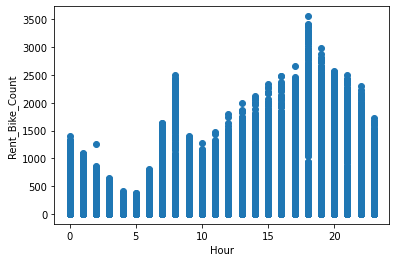

In [67]:
#Plotting the scatter plot of hour vs rented bike count
plt.scatter(x=dataset['Hour'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Hour')
plt.ylabel('Rent_Bike_Count')

From the above Scatter Chart, we can observe that
data points are closely placed to each other, thereby forming
dark linear patterns on the graph.

Text(0, 0.5, 'Rent_Bike_Count')

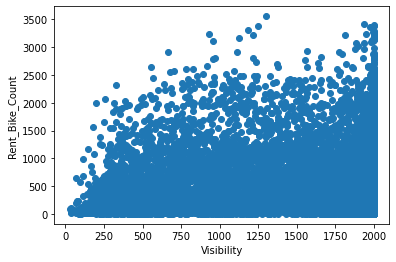

In [68]:
#Plotting the scatter plot of visibility vs rented bike count
plt.scatter(x=dataset['Visibility'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Visibility')
plt.ylabel('Rent_Bike_Count')

Text(0, 0.5, 'Rent_Bike_Count')

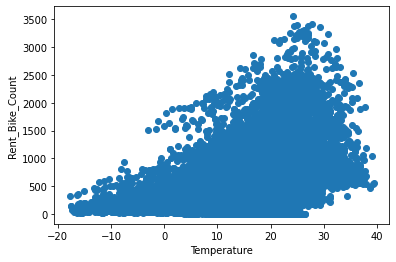

In [69]:
#Plotting the scatter plot of temperature vs rented bike count
plt.scatter(x=dataset['Temperature'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Temperature')
plt.ylabel('Rent_Bike_Count')

From the above distribution, Rental Bike Count is
spread in form of a cloud which is dense around the region
of -20 to 40C. The small tailing clusters towards the higher
end of Y axis shows that almost all the data points will
affect our regression model.


Text(0, 0.5, 'Rent_Bike_Count')

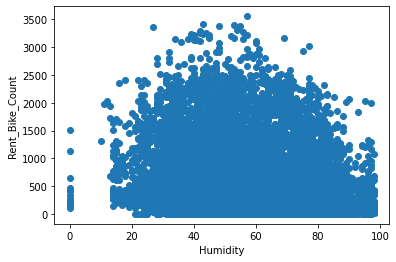

In [70]:
#Plotting the scatter plot of humidity vs rented bike count
plt.scatter(x=dataset['Humidity'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Humidity')
plt.ylabel('Rent_Bike_Count')

From the above Scatter Plot, it is evident that data
points form a cloud for Humidity ranging between 20 to
100. 

Text(0, 0.5, 'Rent_Bike_Count')

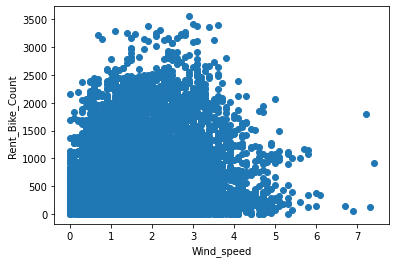

In [71]:
#Plotting the scatter plot of wind speed vs rented bike count
plt.scatter(x=dataset['Wind_speed'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Wind_speed')
plt.ylabel('Rent_Bike_Count')

The data
points form a prominent cloud around the Wind Speed lying
between 0-5 m/s.

Text(0, 0.5, 'Rent_Bike_Count')

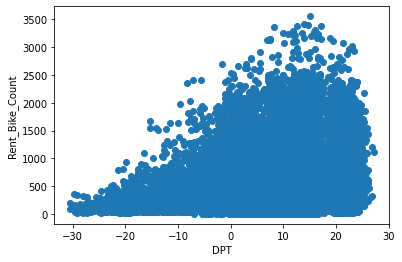

In [72]:
#Plotting the scatter plot of DPT vs rented bike count
plt.scatter(x=dataset['DPT'], y=dataset['Rent_Bike_Count'])
plt.xlabel('DPT')
plt.ylabel('Rent_Bike_Count')

From the above Scatter Plot, the formed data point cloud
depicts that Dew Point Temperatures did not make any
significant impact until Rental Bike Count reached 500.

Text(0, 0.5, 'Rent_Bike_Count')

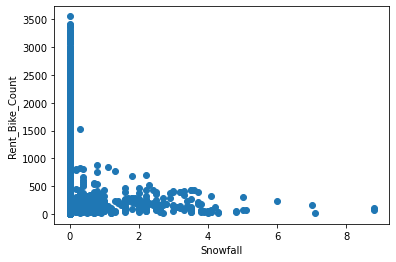

In [73]:
#Plotting the scatter plot of snowfall vs rented bike count
plt.scatter(x=dataset['Snowfall'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Snowfall')
plt.ylabel('Rent_Bike_Count')

The Scatter Plot above suggest, 0 cm Snowfall
dominated the Rental Count distribution and clusters lying till
4 cm. 

Text(0, 0.5, 'Rent_Bike_Count')

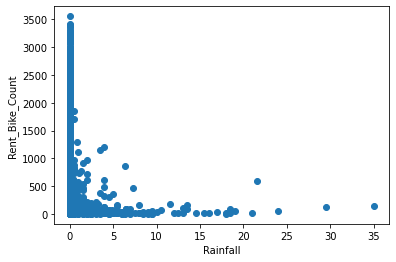

In [74]:
#Plotting the scatter plot of rainfall vs rented bike count
plt.scatter(x=dataset['Rainfall'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Rainfall')
plt.ylabel('Rent_Bike_Count')

The Scatter Plot above suggests that a significant
number of counts lies along the dates when Rainfall was equal
to 0 mm.

#Data Cleaning

#Checking for Outliers

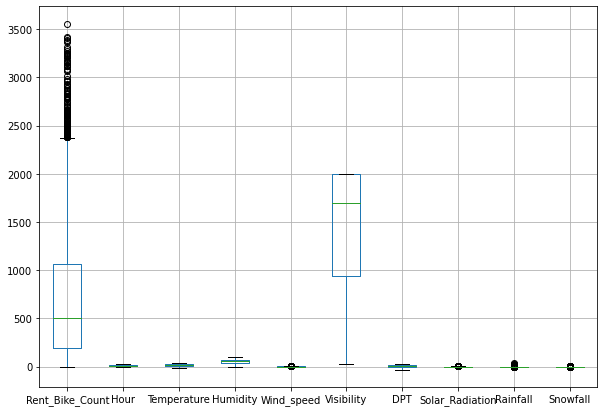

In [75]:
#Checking for outliers by plotting boxplot
fig = plt.figure(figsize =(10, 7))
dataset.boxplot()

We had plotted boxplot for all the columns in the dataset. From this box plot we conclude that in the columns 'Rent_bike_count', 'Wind_speed', 'Solar_radiation', 'Rainfall' and 'Snowfall' outliers are present.

**Let's see one by one....**

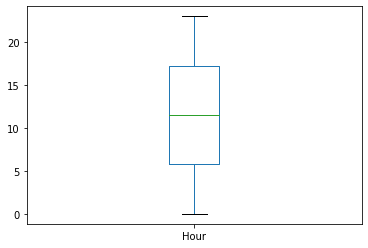

In [76]:
#Plotting boxplot of column "Hour"
dataset['Hour'].plot(kind = 'box')

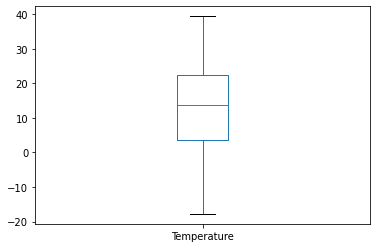

In [77]:
#Plotting boxplot of column "Tempreture"
dataset['Temperature'].plot(kind = 'box')

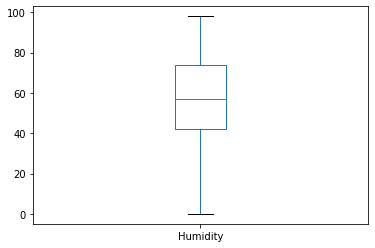

In [78]:
#Plotting boxplot of column "Humidity"
dataset['Humidity'].plot(kind = 'box')

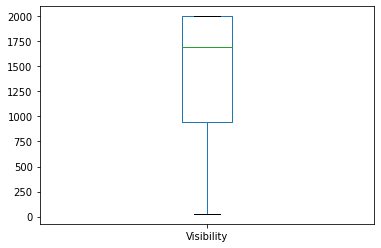

In [79]:
#Plotting boxplot of column "Visibility"
dataset['Visibility'].plot(kind= 'box')

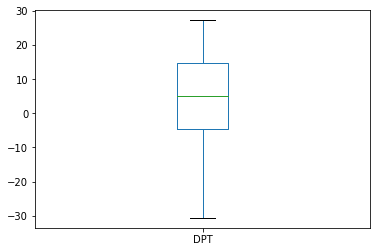

In [80]:
#Plotting boxplot of column "DPT"
dataset['DPT'].plot(kind= 'box')

As we can see there are no outliers present in the columns, namely 'Hour', 'Tempreture', and 'Humidity'and DPT.

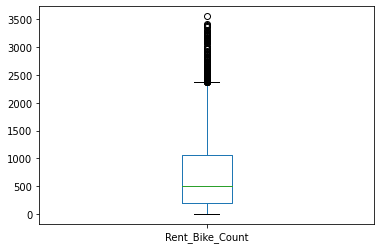

In [81]:
#Plotting boxplot of column "Rent_Bike_Count"
dataset['Rent_Bike_Count'].plot(kind = 'box')

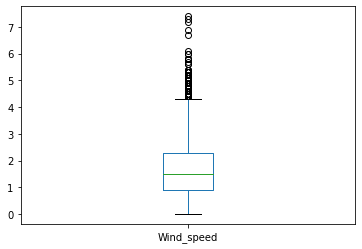

In [82]:
#Plotting boxplot of column "Wind_speed"
dataset['Wind_speed'].plot(kind= 'box')

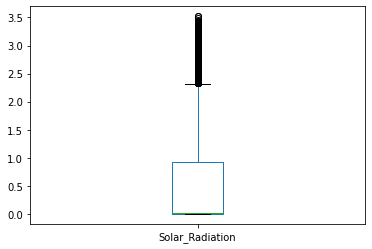

In [83]:
#Plotting boxplot of column "Solar_Radiation"
dataset['Solar_Radiation'].plot(kind= 'box')

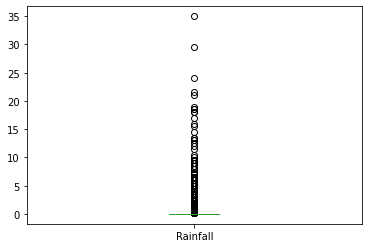

In [84]:
#Plotting boxplot of column "Rainfall"
dataset['Rainfall'].plot(kind= 'box')

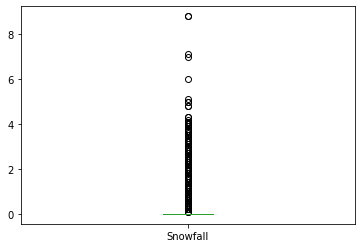

In [85]:
#Plotting boxplot of column "Snowfall"
dataset['Snowfall'].plot(kind= 'box')

Here the outliers are detected in the columns 'Rent_Bike_Count', 'Solar_Padiation', 'Rainfall' and 'Snowfall'.

**Using IQR Score we have to remove outliers present in the dataset.**

**IQR**

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset.

In [86]:
#Removing the outliers 
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rent_Bike_Count     874.25
Hour                 11.50
Temperature          19.00
Humidity             32.00
Wind_speed            1.40
Visibility         1060.00
DPT                  19.50
Solar_Radiation       0.93
Rainfall              0.00
Snowfall              0.00
dtype: float64


The above output prints the IQR scores, which can be used to detect outliers.

**IQR Score**

This technique uses the IQR scores calculated earlier to remove outliers. The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed. The first line of code below removes outliers based on the IQR range and stores the result in the data frame 'dataset_clr'. The second line prints the shape of this data, which comes out to be 6922 observations of 14 variables. This shows that for our data, a lot of records get deleted if we use the IQR method.

In [87]:
#Get the dataframe 
dataset_clr = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_clr.shape

(6922, 14)

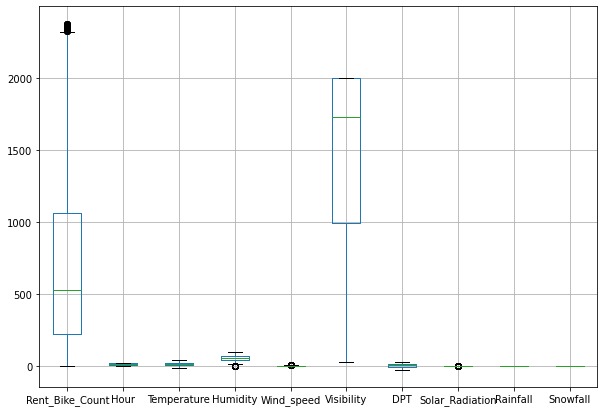

In [88]:
#Plotting boxplot after removing outliers
fig = plt.figure(figsize =(10, 7))
dataset_clr.boxplot()

In [89]:
dataset_clr.head()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#Checking for Null/NaN/Missing Values

In [90]:
#Checking for is their any null value present or not
dataset_clr.isnull().sum()

Date               0
Rent_Bike_Count    0
Hour               0
Temperature        0
Humidity           0
Wind_speed         0
Visibility         0
DPT                0
Solar_Radiation    0
Rainfall           0
Snowfall           0
Seasons            0
Holiday            0
Functioning_Day    0
dtype: int64

As we can see their is no Null value present in the dataset.

#Data Visualization

In [91]:
#Importing seaborn library
import seaborn as sns

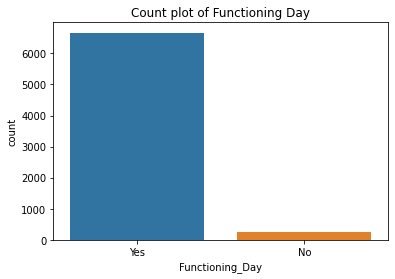

In [92]:
#Plotting the countplot
plt.title("Count plot of Functioning Day")
sns.countplot(x="Functioning_Day", data=dataset_clr)

The count of functioning day was more than that day's where there were no functioning day.

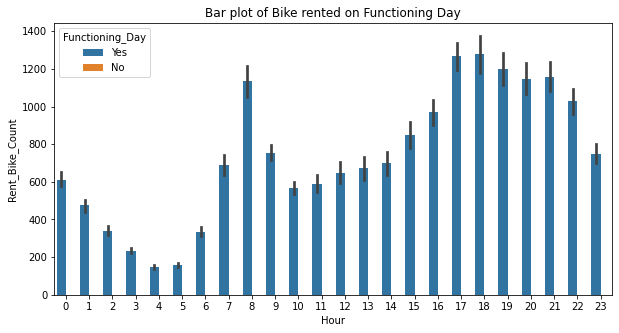

In [93]:
#Plotting barplot 
def barplots(x,y,hue):
    plt.figure(figsize=(10,5))
    plt.title("Bar plot of Bike rented on Functioning Day")
    sns.barplot(x=x,y=y,hue=hue,data=dataset_clr);
barplots('Hour','Rent_Bike_Count','Functioning_Day')

Here we can see for every hour on the functioning day the bike had rented.But when the day was not the functioning day their had no bike rented.

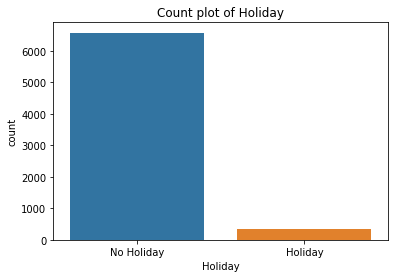

In [94]:
#plotting the count plot of holiday
plt.title("Count plot of Holiday")
sns.countplot(x="Holiday", data=dataset_clr)

The count of the day when the day was not holiday is more than the day when the day was holiday.

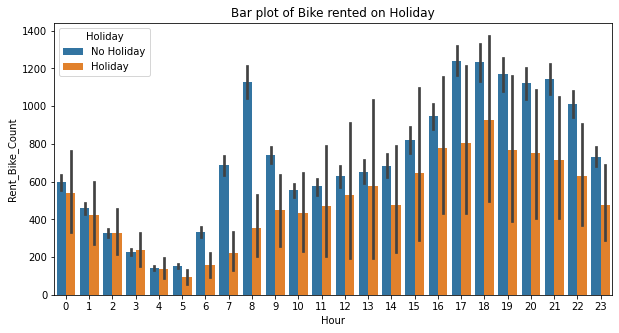

In [95]:
#plotting barplots
def barplots(x,y,hue):
    plt.figure(figsize=(10,5))
    plt.title("Bar plot of Bike rented on Holiday")
    sns.barplot(x=x,y=y,hue=hue,data=dataset_clr);
barplots('Hour','Rent_Bike_Count','Holiday')

In this plot we can say that when the day was not holiday, rented bike count is maximum than when the day was holiday.




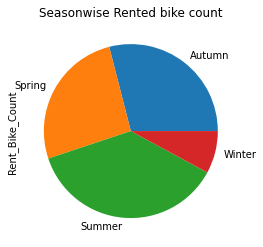

In [96]:
#Seasonwise Rented bike count
plt.title("Seasonwise Rented bike count")
dataset.groupby('Seasons').sum()['Rent_Bike_Count'].plot.pie()

Most of the bike rented in the summer season.

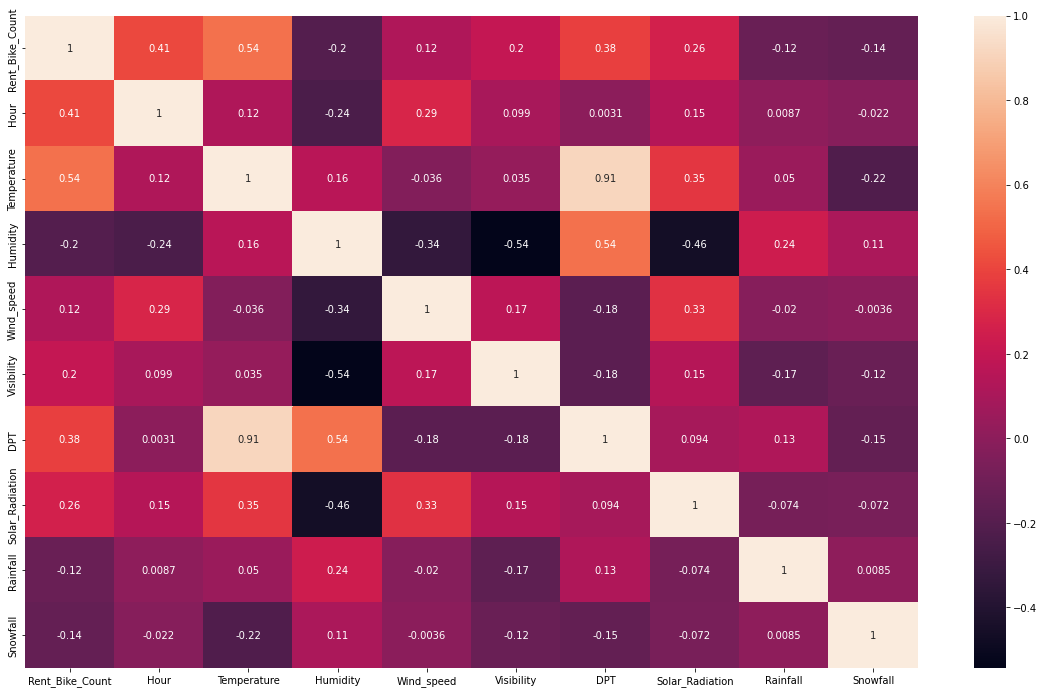

In [97]:
# Correlation
plt.figure(figsize=(20,12))
sns.heatmap(dataset.corr(),annot=True)

As we can see the DPT(Dew Point Tempreture) is strongly correlated with Tempreture with correlation 0.91.So we have to drop the column 'DPT'.

In [98]:
#Drop the column having high correlation
dataset_clr.drop('DPT', axis=1, inplace=True)

In [99]:
dataset_clr.shape

(6922, 13)

#Feature Engineering

In [100]:
#Converting the Date column in Datetime Dtype
dataset_clr['Date']=pd.to_datetime(dataset_clr['Date'])

#Converting the Date column into the 3 new columns('day','month','year')
dataset_clr['Day']=dataset_clr['Date'].dt.day
dataset_clr['Month']=dataset_clr['Date'].dt.month
dataset_clr['Year']=dataset_clr['Date'].dt.year

In [101]:
dataset_clr.head()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


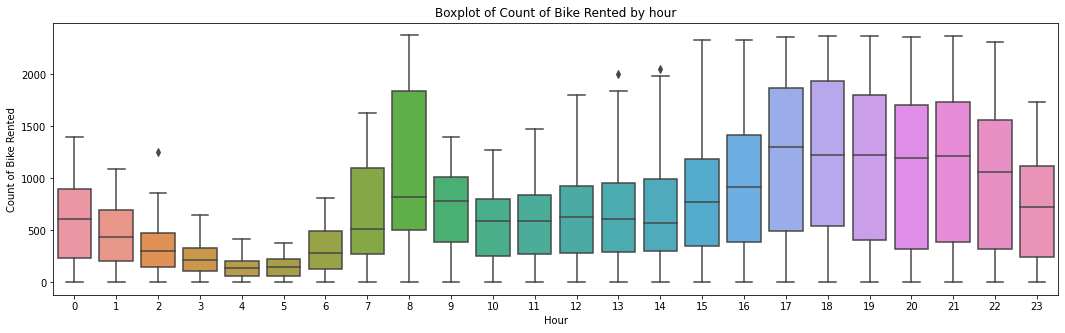

In [102]:
#plotting boxplot of hourly rented bike count
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x=dataset_clr['Hour'], y=dataset_clr['Rent_Bike_Count'], ax=ax)
ax.set_ylabel('Count of Bike Rented')
ax.set_title("Boxplot of Count of Bike Rented by hour");

Above, we can see the trend of bike rent over hours. Quickly, we’ll segregate the bike rent in three categories:

High : 7-9 and 16-12 hours

Average : 10-15 hours

Low : 3-5 hours Here we have analyzed the distribution of total bike rent.

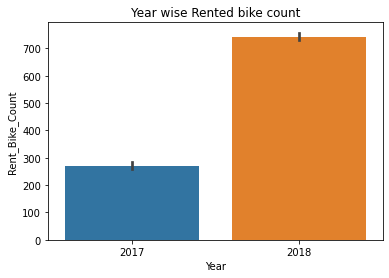

In [103]:
#Plotting barplot between year and rented bike count
plt.title("Year wise Rented bike count")
sns.barplot(x='Year', y='Rent_Bike_Count', data=dataset_clr)

Most of the bike rented in 2018 as compare to 2017.

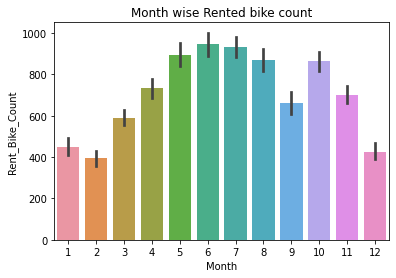

In [104]:
#Plotting barplot between month and rented bike count
plt.title("Month wise Rented bike count")
sns.barplot(x='Month', y='Rent_Bike_Count', data=dataset_clr)

Most of the bike rented in the month of June.


In [105]:
dataset['Solar_Radiation'].mean()

0.5691107305936114

In [106]:
#Converting Contionus variable to categorical variable for ease in prediction
dataset['Visibility']=dataset['Visibility'].apply(lambda x: 1 if x>=2000 else 0)
dataset['Solar_Radiation']=dataset['Solar_Radiation'].apply(lambda x:1 if x>=0.5691 else 0)

In [107]:
dataset.head()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,1,-17.6,0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,1,-17.6,0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,1,-17.7,0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,1,-17.6,0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,1,-18.6,0,0.0,0.0,Winter,No Holiday,Yes


In [108]:
dataset['Solar_Radiation'].value_counts()

0    6007
1    2753
Name: Solar_Radiation, dtype: int64

#Categorical Encoding

**Label Encoding**

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

Let’s implement label encoding on the categorical variable and understand the challenges with label encoding.




In [109]:
#label encoding
encoders_nums = {"Holiday":{"No Holiday":1,"Holiday":0},"Functioning_Day":{"Yes":1,"No":0}}
dataset_pr = dataset_clr.replace(encoders_nums)

In [110]:
dataset_pr

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,1,1,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,1,1,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,1,1,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,1,1,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,1,1,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,1,1,30,11,2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,1,1,30,11,2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,1,1,30,11,2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,1,1,30,11,2018


**One hot encoding**

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

One-Hot Encoding is the process of creating dummy variables.

Let’s implement label encoding on the categorical variable and understand how the dummy variables create.

In [111]:
# One hot encoding
new_dataset = pd.get_dummies(dataset_pr, columns = ['Seasons'], prefix=['Seasons'])
new_dataset.head()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Day,Month,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,1,12,1,2017,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,1,12,1,2017,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,1,12,1,2017,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,1,12,1,2017,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,1,12,1,2017,0,0,0,1


In [112]:
#Let's see how the dataset looks after implementing categorical coding
new_dataset.shape

(6922, 19)

In [113]:
#Let's drop the column which are not necessary
new_dataset.drop(columns=['Date','Day','Year','Snowfall','Rainfall'], axis=1,inplace=True)

Here we dropped some columns from our dataset to get better result.


*   We dropped column 'Date', 'Day' and 'Year' which are not important.
*   We dopped column 'Snowfall'and 'Rainfall' because they are highly skewed towards zero.







In [114]:
new_dataset.head()

,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Holiday,Functioning_Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,1,1,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,1,1,1,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,1,1,1,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,1,1,1,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,1,1,1,0,0,0,1


In [115]:
new_dataset.shape

(6922, 14)

#Creating the data for the Features and the Target Variable.

In [116]:
#Creating the data of dependent variable 'Rented Bike Count'
y = new_dataset['Rent_Bike_Count']

In [117]:
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rent_Bike_Count, Length: 6922, dtype: int64

In [118]:
#Creating the data of Independent variables
X = new_dataset.drop('Rent_Bike_Count', axis=1)

In [119]:
X

,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Holiday,Functioning_Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,-5.2,37,2.2,2000,0.0,1,1,1,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,1,1,1,0,0,0,1
2,2,-6.0,39,1.0,2000,0.0,1,1,1,0,0,0,1
3,3,-6.2,40,0.9,2000,0.0,1,1,1,0,0,0,1
4,4,-6.0,36,2.3,2000,0.0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,0.0,1,1,11,1,0,0,0
8756,20,3.4,37,2.3,2000,0.0,1,1,11,1,0,0,0
8757,21,2.6,39,0.3,1968,0.0,1,1,11,1,0,0,0
8758,22,2.1,41,1.0,1859,0.0,1,1,11,1,0,0,0


#Finding correlation in variables (both dependent and independent, Visualizations on data)

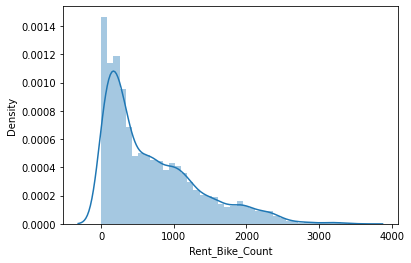

In [120]:
#Plotting distplot of a dependent variable 'Rented Bike Count'
sns.distplot(dataset['Rent_Bike_Count'], hist=True)

As we can see the dependent variable 'Rent_Bike_Count' is skewly distributed.

In [121]:
#Columns of numerical features
numeric_features = ['Rent_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Month']

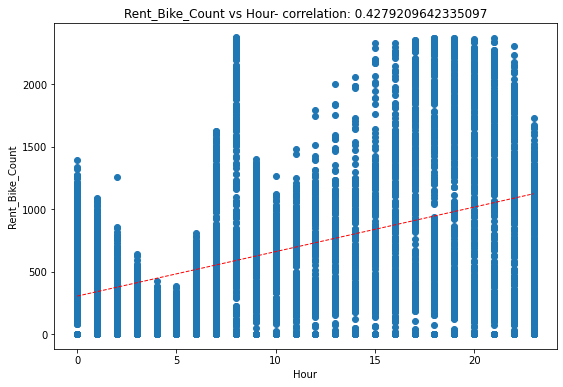

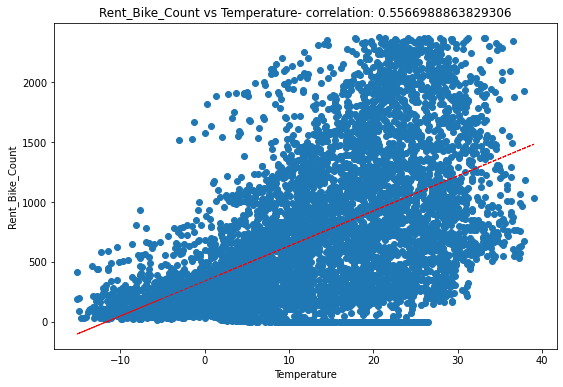

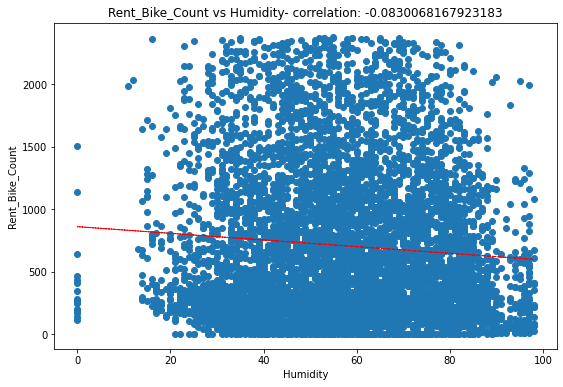

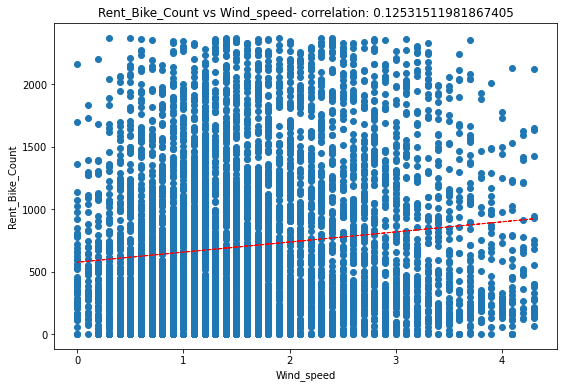

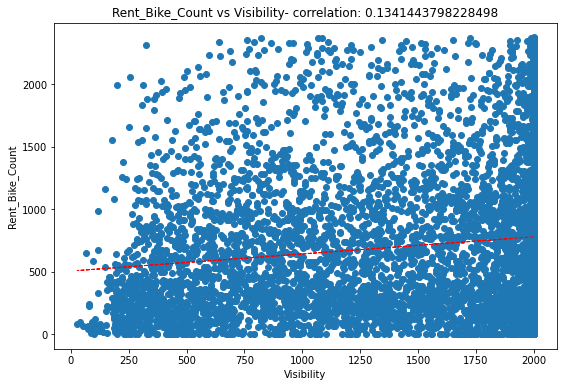

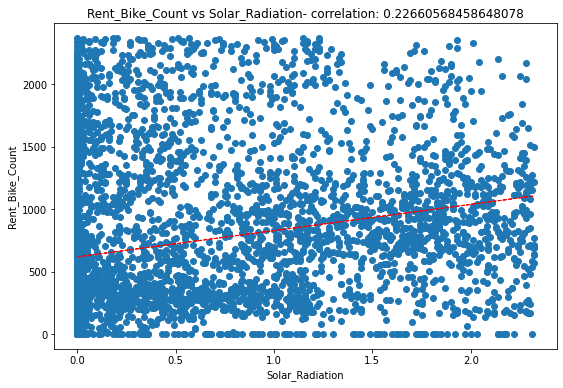

In [122]:
##Scatter plot for numerical features
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = new_dataset[col]
    label = new_dataset['Rent_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rent_Bike_Count')
    ax.set_title('Rent_Bike_Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(new_dataset[col], new_dataset['Rent_Bike_Count'], 1)
    y_hat = np.poly1d(z)(new_dataset[col])

    plt.plot(new_dataset[col], y_hat, "r--", lw=1)

plt.show()

In [123]:
X.head()

,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Holiday,Functioning_Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,-5.2,37,2.2,2000,0.0,1,1,1,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,1,1,1,0,0,0,1
2,2,-6.0,39,1.0,2000,0.0,1,1,1,0,0,0,1
3,3,-6.2,40,0.9,2000,0.0,1,1,1,0,0,0,1
4,4,-6.0,36,2.3,2000,0.0,1,1,1,0,0,0,1


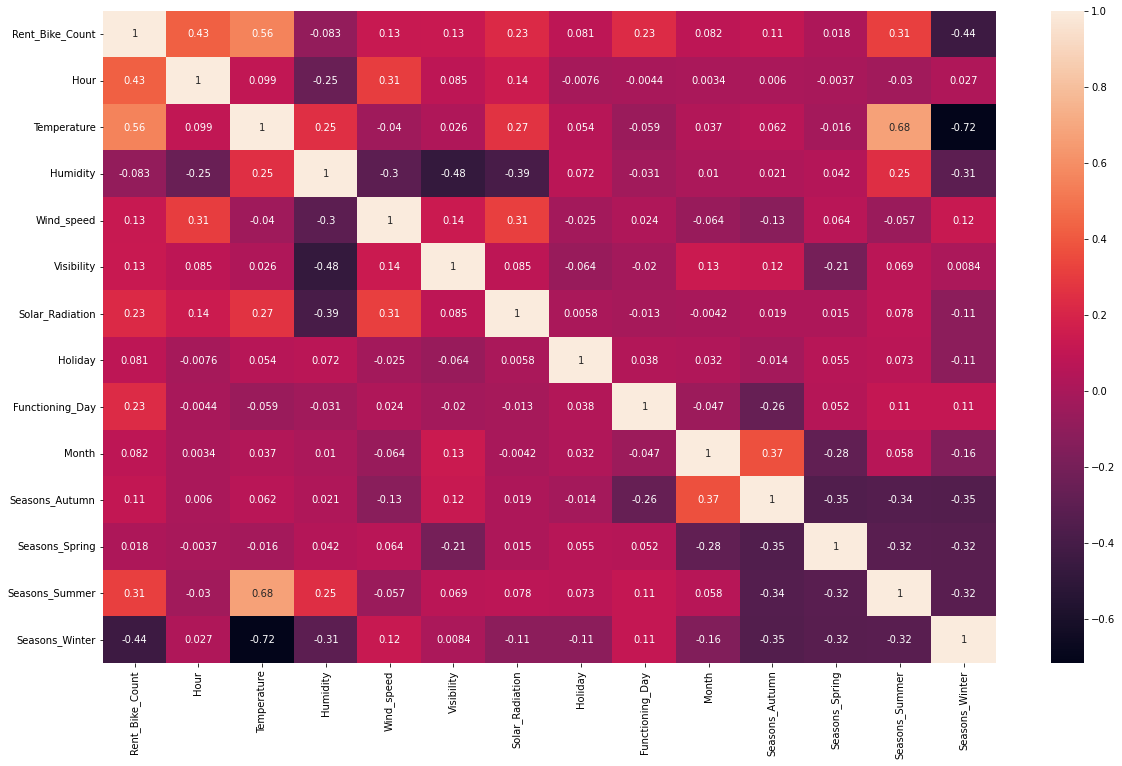

In [124]:
# Correlation
plt.figure(figsize=(20,12))
sns.heatmap(new_dataset.corr(),annot=True)



*   As we can see Temperature is positively correlated with the target variable Rented Bike count with correlation 0.56.


*   Also the Temperature variable have positive correlation of 0.68 with variable Season Summer.


*   The variable Temperature negatively correlated with the Season Winter with correlation 0.72.


*   Also the variables Visibility, Solar Radiation, and all the Seasons have low negative correlation values.


*   The variables Hour, Season Summer and Functioning Day have low corelation with target variable Rented Bike Count.





#Creating the Training and Test Datasets


In [125]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [126]:
X_train

,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Holiday,Functioning_Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
18,18,0.6,66,1.4,2000,0.00,1,1,1,0,0,0,1
2632,16,5.6,42,4.2,2000,0.81,1,1,3,0,1,0,0
8327,23,6.9,60,0.8,1610,0.00,1,1,12,1,0,0,0
2513,17,10.9,98,1.3,222,0.09,1,1,3,0,1,0,0
7505,17,18.4,39,2.1,2000,0.45,0,0,9,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411,3,23.1,80,2.0,1849,0.00,1,1,8,0,0,1,0
4201,1,16.9,61,1.0,844,0.00,1,1,5,0,1,0,0
2117,5,0.6,50,0.1,1026,0.00,1,1,2,0,0,0,1
3260,20,10.3,62,2.0,1749,0.00,1,1,4,0,1,0,0


In [127]:
y_train

18      862
2632    518
8327    702
2513    411
7505      0
       ... 
6411    456
4201    610
2117     72
3260    297
3419    424
Name: Rent_Bike_Count, Length: 4845, dtype: int64